In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.base import BaseEstimator, TransformerMixin
import emoji
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import collections

In [2]:
# Import the dataset
tweet = pd.read_csv("volvo701-1001.csv",error_bad_lines=False)
tweet=tweet.replace(' ', np.nan)
tweet

,Tweet_url,Tweet_id,Tweet_user_id,Tweet_username,Tweet_account,Tweet_user_location,Tweet_user_followers,Tweet_user_following,Tweet_time,Tweet_location,...,Tweet_quote_links,Retweet_url,Retweet_id,Retweet_username,Retweet_account,Retweet_time,Retweet_location,Retweet_content,Retweet_contain_links,Retweet_image_urls
0,https://twitter.com/BobMorris561/status/131140...,1311405554179469313,942724419654443010,Matt Chorley's Micropenis,BobMorris561,"Востряково, Россия",1324,968,2020-09-30 20:40:23,NaN,...,NaN,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/FrostBank/status/132001856...,1320018560819863553,1244480622,Frost Bank,FrostBank,Texas,21156,314,2020-10-24 15:05:24,NaN,...,NaN,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://twitter.com/brittneyinpink/status/1311...,1311410199685668864,1120728898042572802,BrittneyInPink,brittneyinpink,"Kansas City, MO",79,6,2020-09-30 20:58:51,NaN,...,NaN,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://twitter.com/volvodundee/status/1311399...,1311399214941908993,1022453301852467200,Volvo Dundee and Edinburgh,volvodundee,NaN,2,0,2020-09-30 20:15:12,NaN,...,http://ow.ly/1JGJ50BAWFi,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://twitter.com/denttechae/status/13114484...,1311448413402271744,1200875744894898176,Dent Tech UAE,denttechae,"Dubai, United Arab Emirates",2,0,2020-09-30 23:30:41,NaN,...,https://tmblr.co/Z31AeUZ0orUxCe00,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14481,https://twitter.com/Angela_syble/status/127816...,1278160307248979968,1123495770877861888,Syble_Angela,Angela_syble,NaN,13,157,2020-07-01 02:55:38,NaN,...,NaN,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14482,https://twitter.com/marywillhite16/status/1278...,1278154801591676933,1244951307212840960,Mary Willhite,marywillhite16,NaN,49,0,2020-07-01 02:33:46,NaN,...,https://www.amazon.com/dp/B01BO5UEJ6?tag=hmsus-20,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14483,https://twitter.com/AjeshShankar/status/127816...,1278165423423275008,1131516092264865792,"Ajesh Kumar Shankar, Advocate",AjeshShankar,"Bengaluru South, India",50,466,2020-07-01 03:15:58,NaN,...,NaN,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14484,https://twitter.com/evelynbrinnon74/status/127...,1278157263820079105,1264262452465635329,Evelyn Brinnon,evelynbrinnon74,NaN,46,0,2020-07-01 02:43:33,NaN,...,https://www.amazon.com/dp/B07G36FGBR?tag=hmsus-20,NaN,\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Shape of the dataframe is", tweet.shape)
print("The number of nulls in each column are \n", tweet.isna().sum())

Shape of the dataframe is (14486, 27)
The number of nulls in each column are 
 Tweet_url                    0
Tweet_id                     0
Tweet_user_id                0
Tweet_username               0
Tweet_account                0
Tweet_user_location       3387
Tweet_user_followers         0
Tweet_user_following         0
Tweet_time                   0
Tweet_location           13955
Tweet_country_code       13956
Tweet_content                0
Tweet_contain_links       3539
Tweet_image_urls          6902
Tweet_retweet_count          0
Tweet_reply_count            0
Tweet_like_count             0
Tweet_quote_links         6650
Retweet_url              14205
Retweet_id                   0
Retweet_username         14205
Retweet_account          14205
Retweet_time             14205
Retweet_location         14480
Retweet_content          14205
Retweet_contain_links    14280
Retweet_image_urls       14319
dtype: int64


In [4]:
t=tweet['Tweet_content'].to_list()
for i in range(10):
    print("tweet Number"+str(i+1)+": "+t[i])

tweet Number1: @RavenholmCLP Best thing is go to AliExpress and get the best specced rugged smartphone for your budget, which for me is £100 (Ulfefone Armour X, doogee S60 lite, oukitel WP5 or whatever) They're indestructible and you can jump start a car with them.
tweet Number2: It’s important for us all to find time to step away from our social feeds and take a breath. One way to incorporate a break into your day is in your morning routine. Instead of scrolling your feed while you drink your coffee, try sipping your latte outside while you take a walk.
tweet Number3: Follow Me! @brittneyinpink 	Loving my New @riversidetransport Merch! 	.	.	.	.	.	.	.	.	.	#Trucking #trucker #pinky #truckdriver #truckdriverlife  #volvo #freightliner #transportation 	* #RTIfamily	* #RTIcares	* #RTIsupportsWOMEN	* #RTIproud
tweet Number4: The #Volvo #XC60 won the AutoTrader 2020 #Award for “Best Car for Families”		It was praised the for its ease of parking, the interior quality, roominess, reliability and

In [5]:
#Finding Volvo-Specific Tweets
#t1= tweet[tweet['Tweet_content'].str.contains('volvo|Volvo')]
# t1['Tweet_content']

In [6]:
#t1=tweet[~tweet['Tweet_username'].str.contains('volvo|Volvo|Audi|audi|SHEIN|fasting|KetoCycle|Necklace|noodle|Stock')]
t1=tweet[~tweet['Tweet_username'].str.contains('volvo|Volvo')]
t1=t1[t1['Tweet_content'].str.contains('volvo|Volvo|c30|s60|xc40bev|xc90|xc40|xc60|c30|s60')==True]
# sum(t1['Tweet_content'].str.contains('xc40'))

In [7]:
t2=t1[t1['Tweet_country_code'].isnull() == False]
t2['Tweet_country_code']

7        GB
46       MY
50       US
63       ZA
291      US
         ..
14241    GB
14287    US
14294    MY
14308    GB
14431    NO
Name: Tweet_country_code, Length: 449, dtype: object

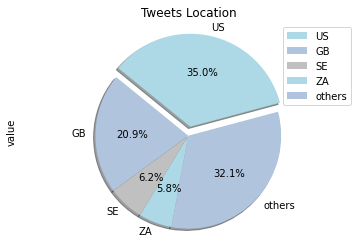

,country,value
0,US,0.349666
1,GB,0.209354
2,IN,0.062361
3,BR,0.057906
4,Others,0.320713


In [8]:
t2['Tweet_country_code'].value_counts().head(n=20)
total=sum(t2['Tweet_country_code'].value_counts())
loc=t2['Tweet_country_code'].value_counts()/total
loc_df=pd.DataFrame({'country':loc.index,'value':loc.values})
not_top_five=loc_df[4:]
val=sum(not_top_five['value'])
loc_df=loc_df[:4]
loc_df=loc_df.append({'country':'Others','value':val},ignore_index=True)
labels='US','GB','SE','ZA','others'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0, 0,0,0)
loc_df.plot.pie(y='value',labels=labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Tweets Location')
plt.axis('equal')
plt.show()
loc_df

In [9]:
dtseries=pd.to_datetime(t1['Tweet_time'])
t1['Created_at']=pd.DatetimeIndex(dtseries.values)

In [10]:
#isinstance(t1['Created_at'],pd.DatetimeIndex)

In [11]:
t1['Created_at'].tail()

14480   2020-07-01 04:20:07
14482   2020-07-01 02:33:46
14483   2020-07-01 03:15:58
14484   2020-07-01 02:43:33
14485   2020-07-01 04:13:01
Name: Created_at, dtype: datetime64[ns]

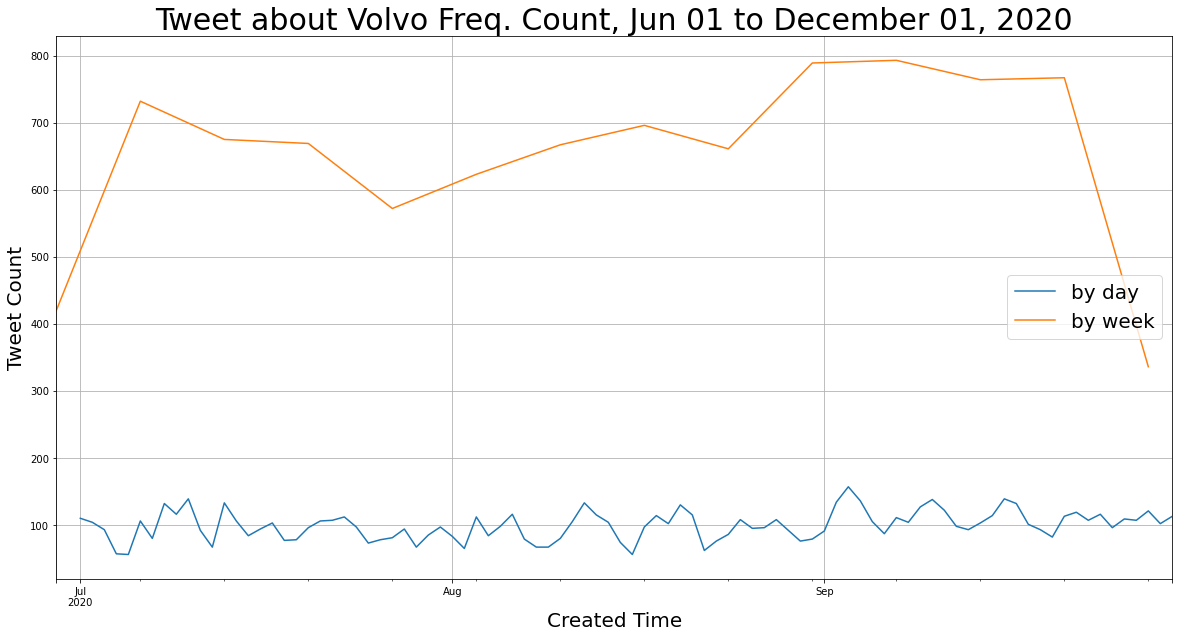

In [12]:
tweet_df_1D =t1.groupby(pd.Grouper(key='Created_at', freq='1D', convention='start')).size()
tweet_df_1W= t1.groupby(pd.Grouper(key='Created_at', freq='1W', convention='start')).size()
# tweet_df_1M= t1.groupby(pd.Grouper(key='Created_at', freq='1M', convention='start')).size()
tweet_df_1D.plot(figsize=(30,10))
tweet_df_1W.plot(figsize=(20,10))
# tweet_df_1M.plot(figsize=(20,15))

plt.ylabel('Tweet Count',size=20)
plt.xlabel('Created Time',size=20)
plt.title('Tweet about Volvo Freq. Count, Jun 01 to December 01, 2020',size=30)
plt.grid(True)
plt.legend(('by day','by week'),fontsize=20,loc=7)

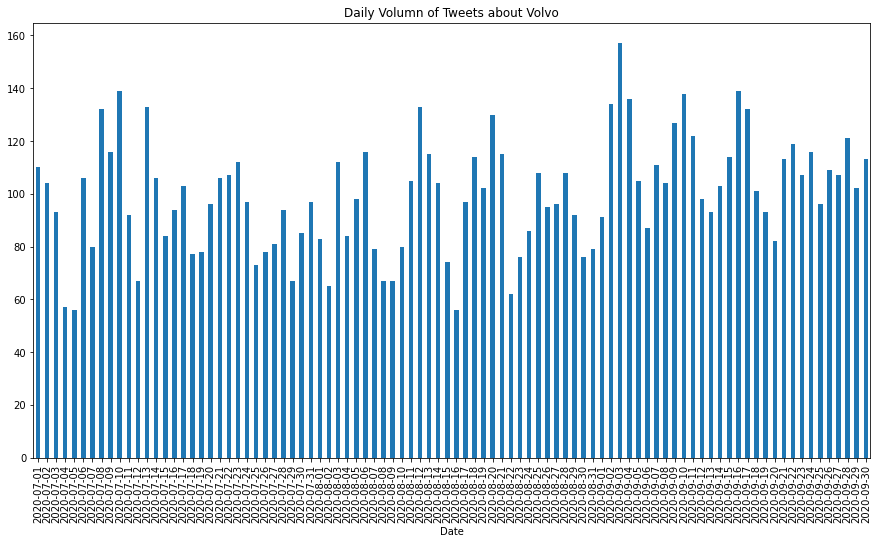

In [13]:
t1.loc[:,'Date']=pd.to_datetime(t1['Tweet_time']).dt.date
t1.loc[:,'Time']=pd.to_datetime(t1['Tweet_time']).dt.time
daily=t1.groupby('Date').size()
daily.plot(x='Date',kind='bar',figsize=(15,8),title="Daily Volumn of Tweets about Volvo")

In [14]:
mean=np.mean(daily)
maxx=np.max(daily)
minn=np.min(daily)
display(mean,maxx,minn)

99.6086956521739

157

56

In [15]:
rt=t1.groupby('Date').sum()['Tweet_retweet_count']
like=t1.groupby('Date').sum()['Tweet_like_count']
reply=t1.groupby('Date').sum()['Tweet_reply_count']

display(np.mean(rt),np.mean(like),np.mean(reply))

64.3695652173913

360.0217391304348

35.619565217391305

In [16]:
t1['weekdaynum'] = t1['Created_at'].dt.dayofweek
t1['weekday'] = t1['Created_at'].dt.day_name()
t1['monthdaynum'] = t1['Created_at'].dt.day
t1['hourofday'] = t1['Created_at'].dt.hour

In [17]:
# t1.pivot_table(index=['weekday'],values='Tweet_id',aggfunc='count')
# t1['hourofday']

Text(0.5, 1.0, 'Tweets sent by weekday')

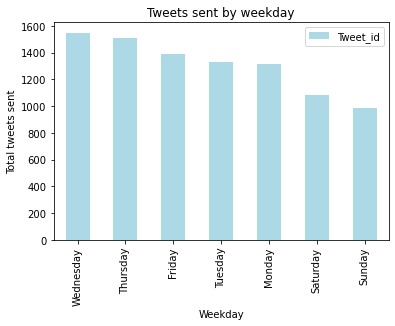

In [18]:
# create a bar plot with weekdays
weekday_df=t1.pivot_table(index=['weekday'],values='Tweet_id',aggfunc='count')
weekday_df=weekday_df.sort_values('Tweet_id',ascending=False)

weekday_df.plot(kind='bar',figsize=(6,4),color='lightblue')

# set the labels and title
plt.ylabel('Total tweets sent')
plt.xlabel('Weekday')
plt.title('Tweets sent by weekday')

# for index,value in enumerate(weekday_df[''])
# plt.xticks()

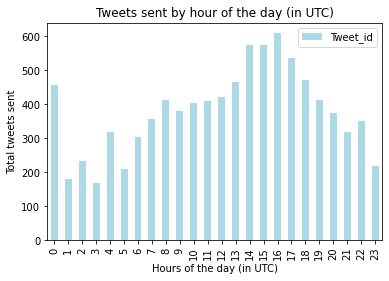

In [19]:
# create a bar plot with hours of day

hour_df=t1.pivot_table(index='hourofday',values='Tweet_id',aggfunc='count')
# hour_df=_df.sort_values('Tweet_id',ascending=False)
hour_df.plot(kind='bar',figsize=(6,4),color='lightblue')

# set the labels and title
plt.ylabel('Total tweets sent')
plt.xlabel('Hours of the day (in UTC)')
plt.title('Tweets sent by hour of the day (in UTC)');

In [20]:
#top 10 retweet
top_retweet=t1.sort_values(by='Tweet_retweet_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_retweet_count']].head(10)
top_retweet

,Tweet_content,Tweet_username,Tweet_retweet_count
0,Naver article: MAMAMOO's Hwasa has recently up...,jn | AYA ❖,371
1,Please share. Red Deer our car was stolen at 5...,Jest Dempsey,204
2,Volvo Registered A Tesla Model Y In Sweden For...,Eva Fox 🦊,195
3,WCL Chandrapur Area started #Skill Development...,Western Coalfields Ltd.,160
4,The @VolvoTrucks 6x6 Articulated Hauler might ...,LEGO,158
5,Some other facts because people keep asking:\t...,mo 🍯,138
6,"#Ford, #Tesla, #Mercedes, and #Volvo are suing...","Anders Corr, Ph.D.",107
7,The legendary #Volvo P1800 could be set for an...,Autocar,89
8,2 Years of #ThalaAjith's Volvo XC90 D5 🚘\t\t#V...,𝓛𝓶𝓷 𝓜𝓾𝓻𝓪𝓵𝓲 ™,76
9,The #1950s #Volvo #PV445 #Duett is an undeniab...,Quirky Rides,69


In [21]:
#top 10 reply
top_reply=t1.sort_values(by='Tweet_reply_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_reply_count']].head(10)
top_reply

,Tweet_content,Tweet_username,Tweet_reply_count
0,Naver article: MAMAMOO's Hwasa has recently up...,jn | AYA ❖,134
1,WCL Chandrapur Area started #Skill Development...,Western Coalfields Ltd.,125
2,Unpopular opinion... SUVs you'd actually buy\t...,Jim Magill,103
3,Volvo Registered A Tesla Model Y In Sweden For...,Eva Fox 🦊,69
4,The @VolvoTrucks 6x6 Articulated Hauler might ...,LEGO,55
5,FINE! Volvo XC90 it is! but I'm going to make ...,Jake E. Munro #BlackLivesMatter,53
6,@colleenrattigan @NorthantsChief Evidence show...,Yogi the dog 🏴󠁧󠁢󠁷󠁬󠁳󠁿,50
7,Hanging out with the big boys 🧡........ #foden...,Sarah Crabtree,49
8,Please share. Red Deer our car was stolen at 5...,Jest Dempsey,30
9,Had the pleasure of having a look around this ...,Shaun 🇬🇧,27


In [22]:
#top 10 like 
top_like=t1.sort_values(by='Tweet_like_count',ascending=False).reset_index()[['Tweet_content','Tweet_username','Tweet_like_count']].head(10)
top_like

,Tweet_content,Tweet_username,Tweet_like_count
0,Volvo Registered A Tesla Model Y In Sweden For...,Eva Fox 🦊,2314
1,Naver article: MAMAMOO's Hwasa has recently up...,jn | AYA ❖,1576
2,The @VolvoTrucks 6x6 Articulated Hauler might ...,LEGO,1277
3,The legendary #Volvo P1800 could be set for an...,Autocar,553
4,FINE! Volvo XC90 it is! but I'm going to make ...,Jake E. Munro #BlackLivesMatter,367
5,FAKUGESI 🔋💚🇸🇪\t\tA Volvo Life. Bless Up @Volvo...,Official Thapelo Mokoena,357
6,Hanging out with the big boys 🧡........ #foden...,Sarah Crabtree,331
7,Had the pleasure of having a look around this ...,Shaun 🇬🇧,316
8,Cars are riding on the popularity of cultural ...,^,313
9,The #1950s #Volvo #PV445 #Duett is an undeniab...,Quirky Rides,305


In [23]:
# from nltk.tokenize import word_tokenize
# print(word_tokenize(t1['clean_text'][1]))

In [24]:
def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'Blues',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k')
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

In [40]:
pd.DataFrame(count[:5]).reset_index().values

array([['Swedish Steel 4 Sale', 469],
       ['Porcellato Engineering', 322],
       ['Zamzam Auto Co.', 283],
       ['Alex von Witzleben', 234],
       ['FinditParts.com', 133]], dtype=object)

In [41]:
count

Swedish Steel 4 Sale      469
Porcellato Engineering    322
Zamzam Auto Co.           283
Alex von Witzleben        234
FinditParts.com           133
                         ... 
flymebaby                   1
れれ                          1
Matt Schultz                1
E-Auto Moto                 1
Tesla Owners Model X        1
Name: Tweet_username, Length: 4202, dtype: int64

In [48]:
d1 = count.to_dict()

In [46]:
count.values.astype(str)

array(['469', '322', '283', ..., '1', '1', '1'], dtype='<U21')

In [58]:
count=t1['Tweet_username'].value_counts()
count[:5]
df_count=pd.DataFrame()
df_count['Tweet_username'] = count.index
df_count['Tweet_content'] = count.values
df_count

,Tweet_username,Tweet_content
0,Swedish Steel 4 Sale,469
1,Porcellato Engineering,322
2,Zamzam Auto Co.,283
3,Alex von Witzleben,234
4,FinditParts.com,133
...,...,...
4197,flymebaby,1
4198,れれ,1
4199,Matt Schultz,1
4200,E-Auto Moto,1


In [59]:
df_count["score"] = df_count["Tweet_content"] / max(df_count["Tweet_content"]) * 50

In [99]:
ccc = 0

for k, v in df_userfollower[["Tweet_username", "score"]].set_index('Tweet_username')["score"].to_dict().items():
    if k in w:
        w[k] += v
    else:
        ccc += 1

print(ccc, len(w))

0 4202


In [112]:
a = sorted(w.items(), key=lambda item: -item[1])[:5]

In [126]:
pd.DataFrame(list(w.items()), columns=["Tweet_username", "Tweet_content"], dtype="str")

,Tweet_username,Tweet_content
0,Swedish Steel 4 Sale,50.000026636379324
1,Porcellato Engineering,34.67818709685442
2,Zamzam Auto Co.,30.174531195293902
3,Alex von Witzleben,25.10329037001586
4,FinditParts.com,14.197070715468415
...,...,...
4197,flymebaby,0.10906035500048576
4198,れれ,0.10779512698242417
4199,Matt Schultz,0.11236326603710972
4200,E-Auto Moto,0.10667639905066444


[('Swedish Steel 4 Sale', 50.000026636379324),
 ('Porcellato Engineering', 34.67818709685442),
 ('Zamzam Auto Co.', 30.174531195293902),
 ('Alex von Witzleben', 25.10329037001586),
 ('FinditParts.com', 14.197070715468415),
 ('TruckerToTrucker.com', 14.228663761507388),
 ('Marshall Motor Group 🌈', 9.52131764982107),
 ('Partbasket', 7.14333659768504),
 ('Waterhouse Cars', 5.224906097619038),
 ('FCP Euro', 5.148941443933111),
 ('Gavin Hales', 4.993615998196986),
 ('EVSHIFT', 4.79816054684739),
 ('VOLVO OF SCOTTSDALE', 3.9447093998730822),
 ('Electric cars Norway Sweden Denmark EV', 4.146582401233089),
 ('Driver4x4', 3.3098983722966353),
 ('Fix Auto Dagenham', 3.0136554618841997),
 ('Redblock Society', 2.9852078087623095),
 ('What Car?', 3.647219662693976),
 ('Nosso Transporte SP', 2.7739859210071898),
 ('Nationwide Haul', 2.6786299831707607),
 ('TMS Motor Group', 2.5675985361000317),
 ('IVS', 2.4523851774748673),
 ('CHCCommercials', 2.4525183593715054),
 ('Andrew Rose', 2.24302783627268),

In [92]:
df_userfollower.sort_values("Tweet_username")

,Tweet_username,Tweet_user_followers,score
8158,#CafeTouba,309,0.004115
8327,#DrNoms,1285,0.017114
9413,#ENDSARS 💡,83,0.001105
1058,#FMauto,51,0.000679
6756,#LSU,1208,0.016088
...,...,...,...
7688,🤖💬 Kari (Car Dealer Chatbot),4249,0.056589
11763,🦊𝐅𝐎𝐗 𝐀𝐍𝐃 𝐁𝐎𝐍𝐄𝐒☠️,1062,0.014144
10687,🦋 YOUR FAVORITE SCORPIO 🦋,1352,0.018006
430,🧶,746,0.009935


In [91]:
df_count.sort_values("Tweet_username")

,Tweet_username,Tweet_content,score
2397,#CafeTouba,1,0.106610
1389,#DrNoms,1,0.106610
2780,#ENDSARS 💡,1,0.106610
309,#FMauto,4,0.426439
3681,#LSU,1,0.106610
...,...,...,...
321,🤖💬 Kari (Car Dealer Chatbot),4,0.426439
4150,🦊𝐅𝐎𝐗 𝐀𝐍𝐃 𝐁𝐎𝐍𝐄𝐒☠️,1,0.106610
2284,🦋 YOUR FAVORITE SCORPIO 🦋,1,0.106610
1518,🧶,1,0.106610


In [51]:
df_userfollower["score"] = df_userfollower["Tweet_user_followers"] / max(df_userfollower["Tweet_user_followers"]) * 50

In [95]:
w = df_count[["Tweet_username", "score"]].set_index('Tweet_username')

In [96]:
w = w["score"].to_dict()

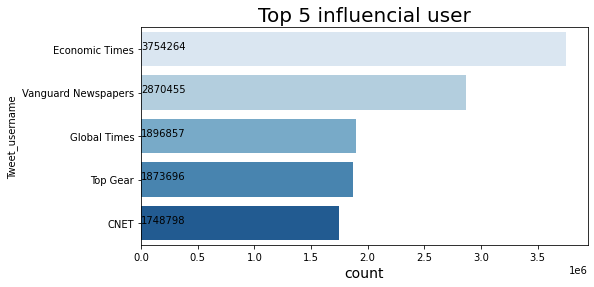

In [26]:
df_userfollower = t1.loc[:,['Tweet_username','Tweet_user_followers']]
df_userfollower.sort_values(by='Tweet_user_followers',ascending=False,inplace=True)
df_userfollower.drop_duplicates(subset='Tweet_username',keep='first',inplace=True)
df_count =df_userfollower.iloc[:5,:]
drawbarplot(x=df_count.Tweet_user_followers,y=df_count.Tweet_username,xlabel='count',title='Top 5 influencial user',figsize=(8,4))

In [56]:
# mentions_keys=list(['#volvo', '#volvoc30', '#volvos60', '#volvoxc90','vovloxc40','xc40bev','xc40','xc90','s60'])
st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['https','CO','RT','Please','via','amp','place','new','ttot','best','great','top','ht','Volvo','car','cars'])
# st_words.update([s.lower() for s in mentions_keys])

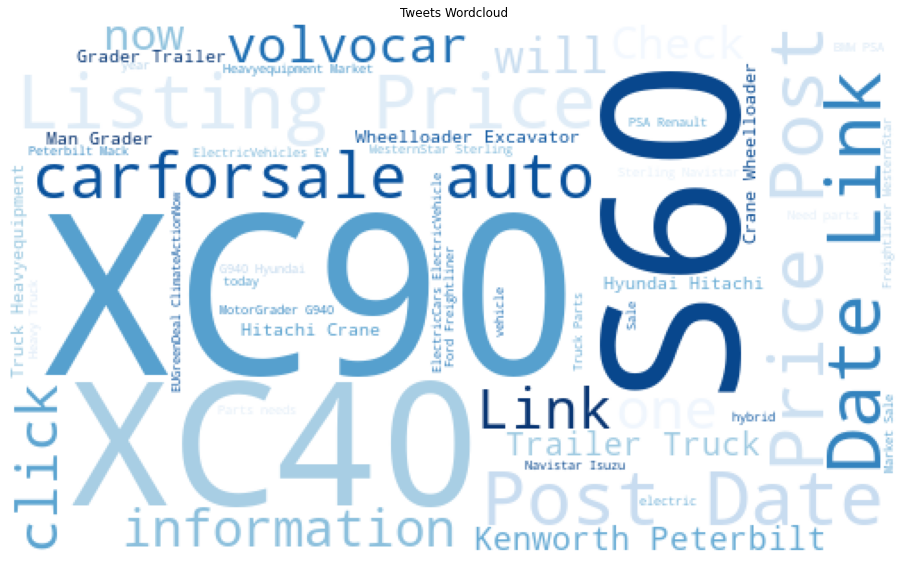

In [57]:
wc = WordCloud(height=300,repeat=False,width=500,max_words=50,stopwords=st_words,colormap='Blues',background_color='white').generate(' '.join(t1['Tweet_content'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud')
plt.axis('off')
plt.show()

In [103]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        #count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        #count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags                           
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df

In [104]:
tc = TextCounts()
df_feature =  tc.fit_transform(t1['Tweet_content'])
df_feature.head(20)

,count_words,count_mentions,count_hashtags,count_urls,count_emojis
2,20,2,12,0,0
4,40,0,6,0,3
5,26,0,14,0,0
6,16,6,7,0,5
7,55,1,0,0,0
9,30,0,10,0,0
10,48,0,4,0,3
12,45,0,0,0,0
15,17,1,3,0,1
16,21,2,13,0,0


## Cleaning

In [130]:
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        #stopwords_list = st_words
        stopwords_list=STOPWORDS
        # Some words which might indicate a certain sentiment are kept via a whitelist        
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)

    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)     
        return clean_X

In [131]:
ct = CleanText()
t1.loc[:,'clean_text'] = ct.fit_transform(t1.loc[:,'Tweet_content'])
#Imputing '[no text]' value where there is no text
# df_final.loc[df_final['TweetBody'] == '','TweetBody'] = '[no text]'
t1['clean_text']

2        follow love new merch truck trucker pinki truc...
4        volvo remov car dent without paint job done sh...
5        need part ford freightlin westernstar sterl na...
6        wcw leev shop ➡️ expo volksnat volvo volvov al...
7        anyon know find conclus car chase tonight lite...
                               ...                        
14480    meet new babi 🚙🤍 rip black honda hellooooo mom...
14482    tuff protect anti glare screen protector volvo...
14483    china volvo car group volvo car own zhejiang g...
14484    yee pin volvo xc xc sensu inch clear temper gl...
14485    volvo my ecu tcu tune km acceler s→ power hp t...
Name: clean_text, Length: 8651, dtype: object